In [4]:
import numpy as np
import matplotlib.pyplot as plt
import rasterio
from rasterio.plot import show as rasterio_show
import pandas as pd
import geopandas as gpd
from sqlalchemy import create_engine
from shapely import affinity
from shapely.geometry import LineString

from scrollstats import BendDataset, RASTER_PATHS

# Set plt params
plt.rcParams["font.family"] = "Arial"
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = 'white'

In [5]:
def extend_line(line: LineString, length:int, origin: int) -> LineString:
    """
    Extend the LineString `line` a given length `length`. 
    `line` must be a LineString with 2 vertices.
    `origin` defines the point from which the scaled line begins.
    """

    # Calculate scale factor required
    sf = (length + line.length) / line.length

    return affinity.scale(line, xfact=sf, yfact=sf, origin=line.coords[origin])

In [15]:
bend_id = "LBR_025"

bend_ds = BendDataset(bend_id)
ridges = bend_ds.get_ridges(proj=True)
transects = bend_ds.get_transects(proj=True)
centerline = bend_ds.get_centerline(proj=True)
bend = bend_ds.get_bend(proj=True)

binary_raster = rasterio.open(RASTER_PATHS[bend_id]['bin'])
dem = rasterio.open(RASTER_PATHS[bend_id]['dem'])

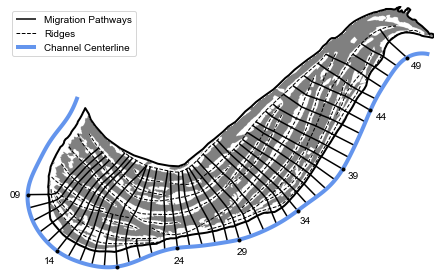

In [27]:
fig, ax = plt.subplots(1,1, figsize=(6.5, 4))

# Plot elements
rasterio_show(binary_raster, ax=ax, cmap="Greys_r", alpha=0.5)
transects.plot(ax=ax, color="k", alpha=1, label="Migration Pathways")
ridges.plot(ax=ax, color="k", ls="--", lw=1, label="Ridges")
centerline.plot(ax=ax, color="cornflowerblue", lw=4, label="Channel Centerline")
bend.boundary.plot(ax=ax, color="k", lw=2)

# Add annotations
for i, row in transects.iloc[::5].iterrows():
    label = row.transect_id[3:]
    geom = row.geometry

    # ax.plot(*geom.xy, color="k")
    ax.scatter(*geom.coords[0], color="k", marker=".", zorder=2)
    ext = extend_line(LineString(geom.coords[:2]), 60, 1)

    label_xy = ext.coords[0]
    ax.annotate(label, label_xy, 
                horizontalalignment="center",
                verticalalignment="center")


# Figure-wide foprmatting
ax.set_axis_off()

img_bottom = binary_raster.bounds[1]
ax.set_ylim(bottom = img_bottom -100)
ax.legend(loc="upper left")

# plt.text(0.1, 0.9, "a)", transform=fig.transFigure, size=12)
plt.tight_layout()
plt.savefig("figures/PrimaryDataProducts_mockup.png", dpi=300)

In [9]:
transects.iloc[::5]

,transect_id,bend_id,cl_distance,length,num_coords,shoot_distance,search_distance,dev_from_90,geometry
0,t_009,LBR_025,532.289492,436.747205,9,300,200,5,"LINESTRING (838955.564 4310888.480, 839069.856..."
5,t_014,LBR_025,847.671758,576.044511,10,300,200,5,"LINESTRING (839095.802 4310619.467, 839180.058..."
10,t_019,LBR_025,1153.517614,518.868771,10,300,200,5,"LINESTRING (839385.282 4310543.377, 839378.227..."
15,t_024,LBR_025,1457.098043,369.624532,6,300,200,5,"LINESTRING (839674.264 4310633.100, 839666.995..."
20,t_029,LBR_025,1756.115785,429.605712,8,300,200,5,"LINESTRING (839970.351 4310672.782, 839945.302..."
25,t_034,LBR_025,2070.915676,426.194734,9,300,200,5,"LINESTRING (840250.517 4310811.720, 840204.214..."
30,t_039,LBR_025,2367.592995,474.812939,9,300,200,5,"LINESTRING (840466.862 4311010.963, 840356.513..."
35,t_044,LBR_025,2679.257193,362.274537,8,300,200,5,"LINESTRING (840599.650 4311292.659, 840513.448..."
40,t_049,LBR_025,2989.889830,186.736079,3,300,200,5,"LINESTRING (840774.613 4311545.477, 840687.903..."
